## CTD Transect Report, Lake Zug, 30/10/2025

In [ ]:
# imports
import xarray as xr
import pandas as pd
import numpy as np
from pyrsktools import RSK
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone

In [21]:
file_path = "Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2025/VerticalProfiles/to_be_processed/20251030/066131_20251030_1318.rsk"

In [25]:
def casts_to_profiles(df, downcast, upcast, file_path, file_type, air_pressure):
    profiles = []
    for index, cast in enumerate(downcast):
        if index == 0:
            name = os.path.splitext(os.path.basename(file_path))[0]
        else:
            name = os.path.splitext(os.path.basename(file_path))[0] + "_{}".format(index)
        bottom = cast[-1] - cast[0]
        df_profile = df.iloc[cast[0]: upcast[index][-1] + 1]
        data = {
            "name": name,
            "file": os.path.basename(file_path),
            "folder": os.path.dirname(file_path),
            "type": file_type,
            "bottom_index": bottom,
            "data": df_profile
        }
        if air_pressure:
            data["air_pressure"] = air_pressure
        profiles.append(data)
    return profiles

def flatten(nested_list):
    flattened = []
    for item in nested_list:
        if isinstance(item, list):
            flattened.extend(flatten(item))
        else:
            flattened.append(item)
    return flattened

In [26]:
def read_rbr(file_path):
    column_conversion = {
        "timestamp": "time",
        "pressure": "Press",
        "temperature": "Temp",
        "conductivity": "Cond",
        "chlorophyll": "Chl_A",
        "dissolved_o2_saturation": "sat",
        "dissolved_o2_concentration": "DO_mg",
    }
    air_pressure = False
    with RSK(file_path) as rsk:
        rsk.readdata()
        df = pd.DataFrame(rsk.data["timestamp"], columns=["time"])
        for column in rsk.channelNames:
            if column in column_conversion:
                df[column_conversion[column]] = rsk.data[column]
        df["time"] = df["time"].dt.tz_localize('UTC').astype("int64") // 10 ** 3

        rsk.computeprofiles()
        downcast = rsk.getprofilesindices(direction="down")
        upcast = rsk.getprofilesindices(direction="up")
        air_idx = np.setdiff1d(np.arange(len(df)), np.array(flatten([downcast, upcast])))
        if len(air_idx) > 0:
            pressure = np.array(df["Press"])
            air_pressure = np.nanmean(pressure[air_idx])

    profiles = casts_to_profiles(df, downcast, upcast, file_path, "RBR", air_pressure)
    if len(profiles) == 0:
        return False
    else:
        return profiles


In [27]:
profiles = read_rbr(file_path)

Ruskin profile and cast annotations will be deleted as they might conflict with the new profiles detected


In [28]:
profiles

[{'name': '066131_20251030_1318',
  'file': '066131_20251030_1318.rsk',
  'folder': 'Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2025/VerticalProfiles/to_be_processed/20251030',
  'type': 'RBR',
  'bottom_index': 382,
  'data':            time      Cond       Temp      Press       DO_mg        sat
  40   1761817217  0.201007  11.932983   9.683965  296.923248  88.142776
  41   1761817217  0.202165  12.671448   9.779518  297.780304  89.886955
  42   1761817218  0.202187  12.953949   9.873145  297.782654  90.458961
  43   1761817218  0.202149  13.049103   9.966009  285.778168  86.997147
  44   1761817219  0.202087  13.081543   9.965119  285.778473  87.060249
  ..          ...       ...        ...        ...         ...        ...
  642  1761817518  0.202273  13.102692  10.336819  264.767029  80.697418
  643  1761817518  0.202157  13.103699  10.099657  265.816467  81.019058
  644  1761817519  0.202405  13.104431   9.844217  265.815491  81.020164
  645  1761817519  0.202208  13.104828   9.6

In [29]:
len(profiles)

12

In [43]:
profiles[10]

{'name': '066131_20251030_1318_10',
 'file': '066131_20251030_1318.rsk',
 'folder': 'Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2025/VerticalProfiles/to_be_processed/20251030',
 'type': 'RBR',
 'bottom_index': 1455,
 'data':              time      Cond       Temp      Press       DO_mg        sat
 14652  1761827811  0.005188  11.535461   9.715911  294.582855  86.590836
 14653  1761827812  0.199219  11.854034   9.767645  294.361694  87.224670
 14654  1761827812  0.199373  12.544250   9.910797  284.122375  85.518120
 14655  1761827813  0.199215  12.766937  10.074122  284.124603  85.948059
 14656  1761827813  0.199295  12.838501  10.087423  271.779968  82.345901
 ...           ...       ...        ...        ...         ...        ...
 16401  1761828686  0.199211  12.890778  10.807229  252.157364  76.490021
 16402  1761828686  0.199084  12.891296  10.423170  254.047897  77.064354
 16403  1761828687  0.198850  12.889099   9.961823  254.046875  77.060173
 16404  1761828687  0.198254  12.88

In [31]:
profiles[0]['data']

,time,Cond,Temp,Press,DO_mg,sat
40,1761817217,0.201007,11.932983,9.683965,296.923248,88.142776
41,1761817217,0.202165,12.671448,9.779518,297.780304,89.886955
42,1761817218,0.202187,12.953949,9.873145,297.782654,90.458961
43,1761817218,0.202149,13.049103,9.966009,285.778168,86.997147
44,1761817219,0.202087,13.081543,9.965119,285.778473,87.060249
...,...,...,...,...,...,...
642,1761817518,0.202273,13.102692,10.336819,264.767029,80.697418
643,1761817518,0.202157,13.103699,10.099657,265.816467,81.019058
644,1761817519,0.202405,13.104431,9.844217,265.815491,81.020164
645,1761817519,0.202208,13.104828,9.631198,265.439209,80.906128


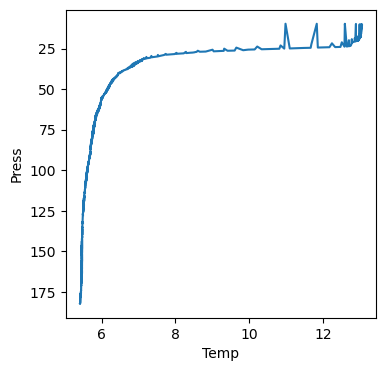

In [40]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.lineplot(profiles[6]['data'], x='Temp', y='Press', ax=ax)

ax.invert_yaxis()

plt.show()

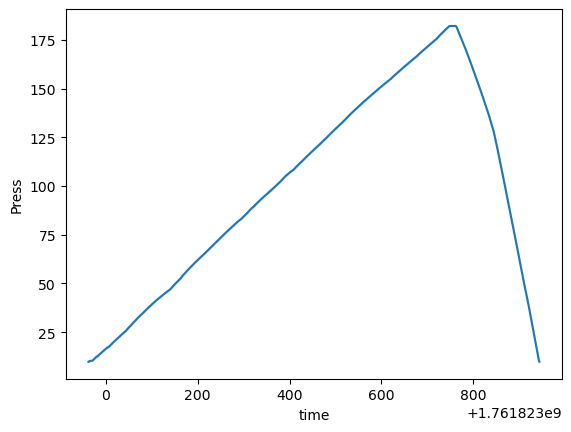

In [45]:
fig, ax = plt.subplots()

sns.lineplot(profiles[6]['data'], x='time', y='Press')

plt.show()

In [49]:
def process_profiles(profiles, folder, template):
    #os.makedirs(folder, exist_ok=True)
    #pdf_pages = PdfPages(os.path.join(folder, 'profiles_requiring_metadata.pdf'))
    plots_per_page = 6
    total_plots = len(profiles)

    for i in range(0, total_plots, plots_per_page):
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8.5, 11))
        axes = axes.flatten()

        for j in range(plots_per_page):
            plot_index = i + j
            if plot_index < total_plots:
                profile = profiles[plot_index]
                time = datetime.fromtimestamp(np.array(profile["data"]["time"])[0]).strftime('%H:%M %d %B %Y')
                x = np.array(profile["data"]["Temp"])
                y = np.array(profile["data"]["Press"]) * -1
                axes[j].plot(x, y, color="lightgrey")
                x[profile["bottom_index"] + 1:-1] = np.nan
                axes[j].plot(x, y, color="red", label=profile["type"])
                axes[j].set_title(profile["name"] + ".meta\n" + time)
                axes[j].set_xlabel("Temperature (°C)")
                axes[j].set_ylabel("Pressure (dbar)")
                axes[j].legend()
            else:
                axes[j].axis('off')
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        #pdf_pages.savefig(fig)
        #plt.close(fig)
        plt.show()
    #pdf_pages.close()

    """
    with open(template, 'r') as f:
        metadata = json.load(f)
    for profile in profiles:
        m = metadata.copy()
        time = datetime.fromtimestamp(np.array(profile["data"]["time"])[0])
        m["filename"] = profile["file"]
        m["campaign"]["Device"] = profile["type"]
        m["campaign"]["Date of measurement"] = time.strftime('%Y-%m-%d')
        m["profile"]["Profile name"] = profile["name"]
        m["profile"]["Time of measurement (local)"] = time.strftime('%H:%M')
        with open(os.path.join(folder, profile["name"] + ".meta"), 'w') as f:
            json.dump(m, f, indent=4)
    """

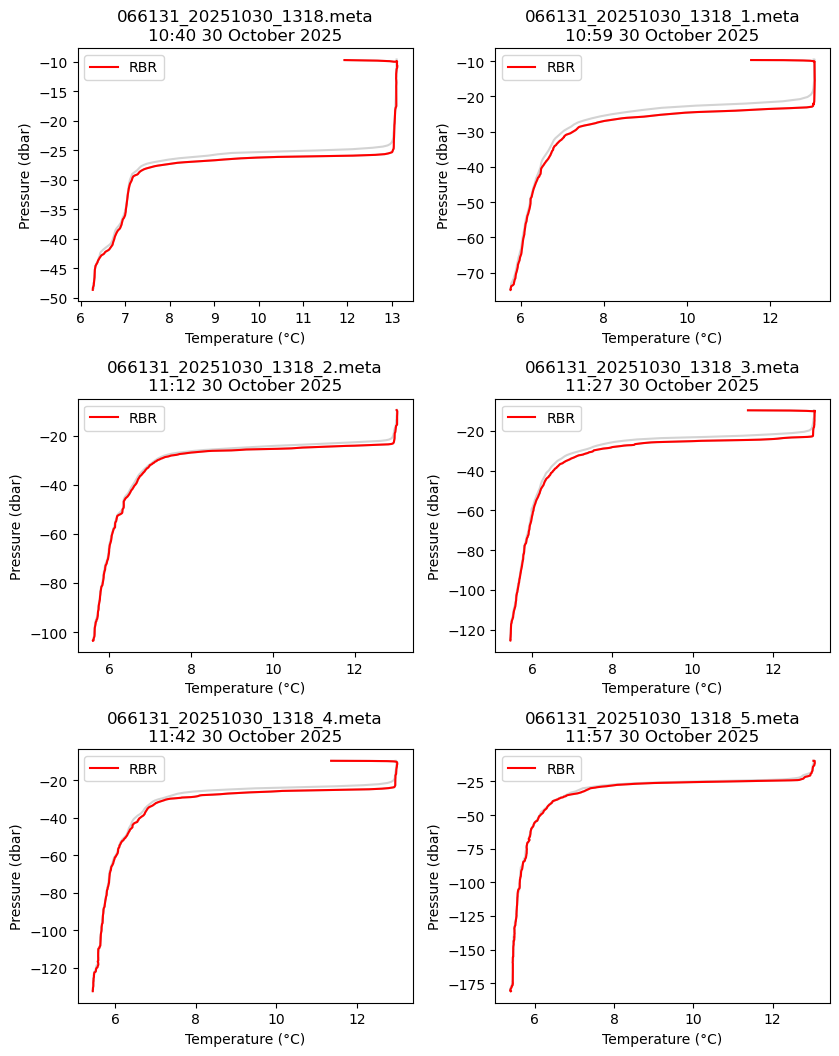

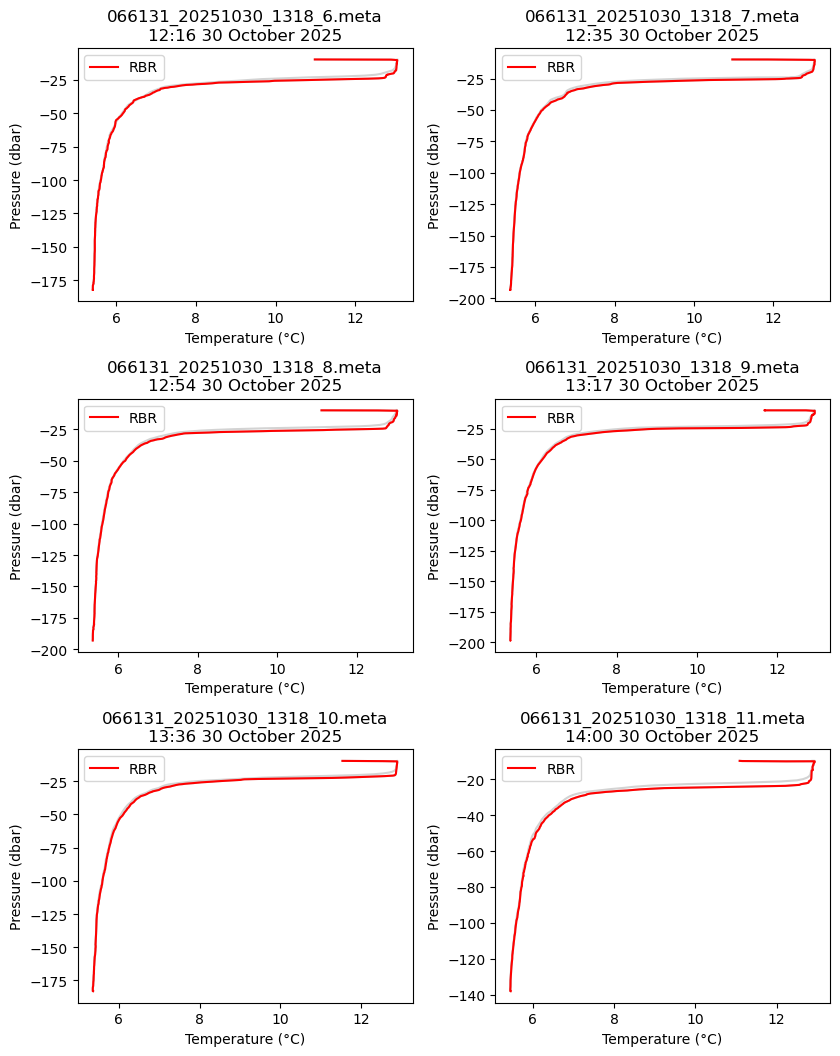

In [50]:
process_profiles(profiles, None, None)